<strong>
        <center><h4 style = "margin-right:60px"><font size = 6> Image Captioning-Attention mechanism</font></h4></center>
    </strong>

<center><h1 class="list-group-item list-group-item-success"><font size = 6>Image Captioning -Scratch(attention mechanism)</font></h1></center><br>

<center><img src  = "https://miro.medium.com/max/1200/0*l9ukrShU3cp2SU_n.gif"></center><br>

## Introduction
<font size = 3>   
Caption generation is a challenging artificial intelligence problem where a textual description must be generated for a given photograph.It requires both methods from computer vision to understand the content of the image and a language model from the field of natural language processing to turn the understanding of the image into words in the right order. </font><br>

## Problem Statement
<font size = 3>  
With the recent advancement in computational hardware & software, Deep learning (DL) has revolutionized the future of artificial intelligence (AI) and cognition based intelligence. It has shown outstanding results in the areas of  computer vision and Natural Language Processing. Many research efforts have produced remarkable results in mapping images to high-level features, as explored in Alex Krizhevsky et al.’s 2012 paper which won the ImageNet Large Scale Visual Recognition Challenge  and more recent work has extended deep learning to various use cases

But contextual data predictions in image video and audio have been difficult due to complexity of human language, with various phonetics and meaning of the same words producing various context</font>
    
## Aim
<font size = 3>  
We plan to produce a better model that tries to perform image captioning based on the scene graph and entity relations followed by the reversal of the context to generate the image to demonstrate how the context is interpreted from the image and vice versa</font>



## Techniques Used 
<ul>
  <li><p>Raditional CNN-RNN model</p></li>
  <li><p>Attention model(if required)</p></li>
  <li><p>Text and Image preprocessing</p></li>
  <li><p>Data Visualization using wordcloud</p></li>
  <li><p>Model training and model evaluation (INCEPTIONV3)</p></li>
  <li><p>Greedy search vs Beam search and BLUE Score</p></li>
  
</ul>


    


<div style="background:#c72e57;color:#fff;padding:1em 2em 1.5em 2em;border-radius: 3px;font-weight:bold">
    <strong>
        <h4 style = "color:#fff"><font size = 4>IMPORTING PACKAGES</font></h4>
    </strong>
</div><br>

In [1]:
#Import all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from keras.models import load_model
from PIL import Image
#used for creating Progress Meters or Progress Bars
from tqdm import tqdm


In [2]:
import glob
from gtts import gTTS
from playsound import playsound
from IPython import display
import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS


In [28]:
import numpy as np 
import pandas as pd 
import os
import pickle



 <h2> Data Understanding and Visualization
</h2><ul>
  <li><p>Import the dataset and read image and captions into two seperate variables</p>
        </li>
  <li><p>Visualise both the images & text present in the dataset</p></li>
  <li>Visualise the top 30 occuring words in the captions
</li>
    li>Visualise the top 30 occuring words in the captions
</li>
<li>Create a list which contains all the captions & path</li>
</ul>





In [4]:
images='Flickr8k_Dataset/Images'
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


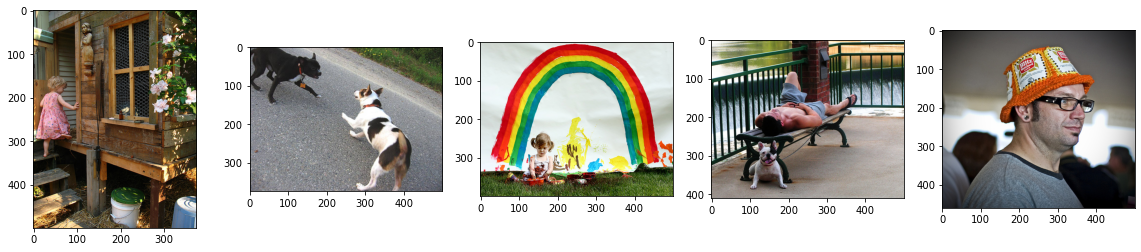

In [5]:
import imageio
#Visualising first 5 images :
Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)


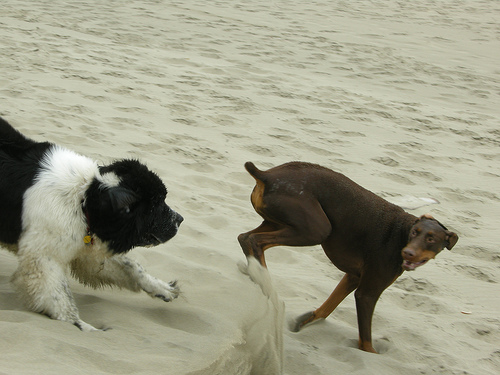

In [6]:
import random
Image.open(all_imgs[random.randrange(40, 60, 3)])# view a random image
import random
Image.open(all_imgs[random.randrange(40, 60, 3)])

In [7]:
text_file = 'Flickr8k_Dataset/captions.txt'
def load_doc(filename):
    open_file = open(text_file, 'r', encoding='latin-1' ) 
    text = open_file.read() 
    open_file.close()
    return text
doc = load_doc(text_file)

In [8]:
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


In [9]:
img_path='Flickr8k_Dataset/Images/'
all_img_id = [] 
all_img_vector = [] 
annotations = [] 

with open('Flickr8k_Dataset/captions.txt' , 'r') as fo:
  next(fo) 
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.')) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

ID  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                    Path  \
0      Flickr8k_Dataset/Images/1000268201_693b08cb0e.jpg   
1      Flickr8k_Dataset/Images/1000268201_693b08cb0e.jpg   
2      Flickr8k_Dataset/Images/1000268201_693b08cb0e.jpg   
3      Flickr8k_Dataset/Images/1000268201_693b08cb0e.jpg   
4      Flickr8k_Dataset/Images/1000268201_693b08cb0e.jpg   
...                                                  ...   
40450   Flickr8k_Dataset/Images/997722733_0cb5439472.jpg   
40451   Flickr8k_Dataset/Images/997722733_0cb5439472.jpg   
40452   Flickr8k_Dataset/Images/997722733_0cb5439472.jpg   
40453   Flickr8k_Dataset/Images/997722733_0cb5439472.jpg   
40454   Flickr8k_Dataset/Images/997722733_0cb5439472.jpg   

                                                Captions  
0      A child in a pink dress is climbing up a set o...  
1                   A girl going into a wooden building   
2        A little girl climbing into a wooden playhouse   
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451            A man is rock climbing high in the air   
40452  A person in a red shirt climbing up a rock fac...  
40453                     A rock climber in a red shirt   
40454  A rock climber practices on a rock climbing wall   

[40455 rows x 3 columns]

In [10]:
#check total captions and images present in dataset
print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_imgs)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [11]:
#Create the vocabulary & the counter for the captions
vocabulary = [word.lower() for line in annotations for word in line.split()]
val_count = Counter(vocabulary) 

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125
dogs :  2095
running :  1996


Text(0, 0.5, 'Count')

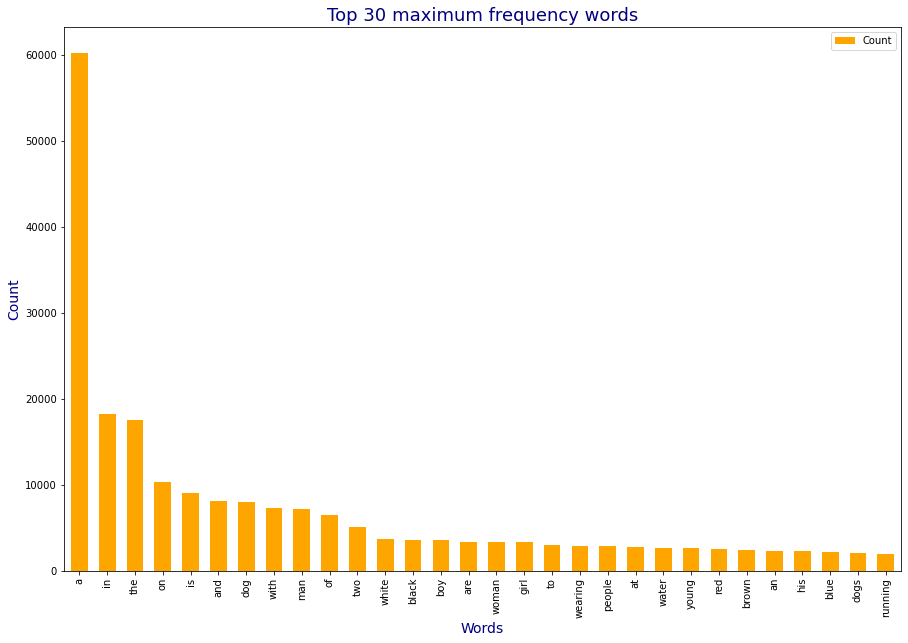

In [12]:
#Visualise the top 30 occuring words in the captions
for word, count in val_count.most_common(30):
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words", fontsize = 18, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')


### Clearly STOPWORDS form a clear majority

**Stop words are a set of commonly used words in a language.**

    Examples of stop words in English are “a”, “the”, “is”, “are” and etc. 
    
*Stop words are commonly used in **Text Mining and Natural Language Processing (NLP)** to eliminate words that are so commonly used that they carry very little useful information.*

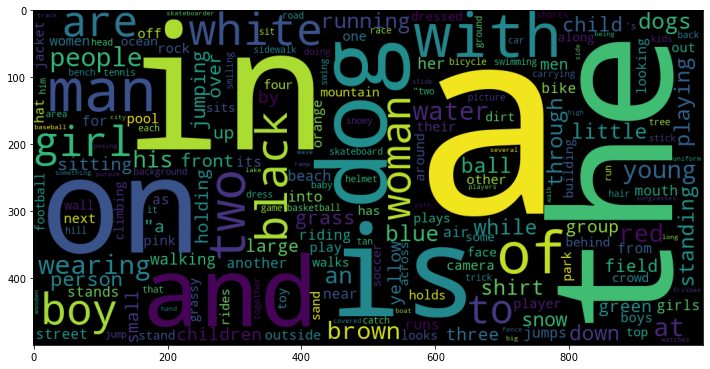

In [13]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

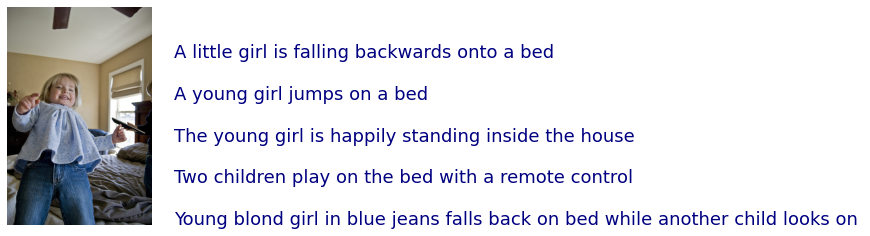

In [14]:
def caption_with_img_plot(image_id, frame) :
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[8051], df)


 <h2> Clean Data
</h2><ul>
<li><p> Remove punctuations</p></li>
<li><p>Convert captions to lowercase</p></li>
<li>Visualise the top 30 occuring words in the captions</li>
<li>Visualise the top 30 occuring words in the captions</li> 
<li>Create a list which contains all the captions & path</li>
</ul>





In [15]:
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(annotations)) :
  line = annotations[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]

  annotations[r] = ' '.join(line)


In [16]:
#add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [17]:
##list contatining captions for an image
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

 <h2> Data Preprocessing</h2>
 <ul>
  <li><p>Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters./p>
        </li>
  <li><p>This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.</p></li>
    <li><p>Replace all other words with the unknown token "UNK"</p>
</li>
    <li><p>Create word-to-index and index-to-word mappings.</p>
</li>
    <li><p>Pad all sequences to be the same length as the longest one</p></li>
</ul>




In [18]:
# Creating the tokenizer
top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False, 
                      oov_token = 'UNK')

In [19]:
# Creating word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations)
#transform each text into a sequence of integers
train_seqs = tokenizer.texts_to_sequences(annotations)

In [20]:
# We add PAD token for zero
tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [21]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [22]:
tokenizer.word_index

{'UNK': 1,
 '<start>': 2,
 '<end>': 3,
 'in': 4,
 'the': 5,
 'on': 6,
 'is': 7,
 'and': 8,
 'dog': 9,
 'with': 10,
 'man': 11,
 'of': 12,
 'two': 13,
 'white': 14,
 'black': 15,
 'boy': 16,
 'are': 17,
 'woman': 18,
 'girl': 19,
 'to': 20,
 'wearing': 21,
 'people': 22,
 'at': 23,
 'water': 24,
 'young': 25,
 'red': 26,
 'brown': 27,
 'an': 28,
 'his': 29,
 'blue': 30,
 'dogs': 31,
 'running': 32,
 'through': 33,
 'playing': 34,
 'while': 35,
 'down': 36,
 'little': 37,
 'shirt': 38,
 'standing': 39,
 'ball': 40,
 'grass': 41,
 'person': 42,
 'child': 43,
 'snow': 44,
 'jumping': 45,
 'over': 46,
 'three': 47,
 'front': 48,
 'sitting': 49,
 'small': 50,
 'field': 51,
 'up': 52,
 'holding': 53,
 'large': 54,
 'group': 55,
 'by': 56,
 'green': 57,
 'yellow': 58,
 'children': 59,
 'walking': 60,
 'men': 61,
 'her': 62,
 'into': 63,
 'beach': 64,
 'air': 65,
 'near': 66,
 'jumps': 67,
 'mouth': 68,
 'street': 69,
 'runs': 70,
 'for': 71,
 'another': 72,
 'riding': 73,
 'from': 74,
 'its': 

In [23]:
# Creating a word count for our tokenizer to visualize the Top 30 occuring words after text processing

tokenizer_top_words = [word for line in annotations for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)


<start> :  40455
<end> :  40455
in :  18182
the :  17676
on :  10367
is :  9069
and :  8057
dog :  7956
with :  7308
man :  7164
of :  6496
two :  5546
white :  3710
black :  3627
boy :  3534
are :  3365
woman :  3320
girl :  3284
to :  3005
wearing :  2917
people :  2837
at :  2819
water :  2676
young :  2610
red :  2553
brown :  2471
an :  2358
his :  2255
blue :  2125
dogs :  2097


C:\Users\bhatt\AppData\Local\Temp\ipykernel_9276\645775341.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


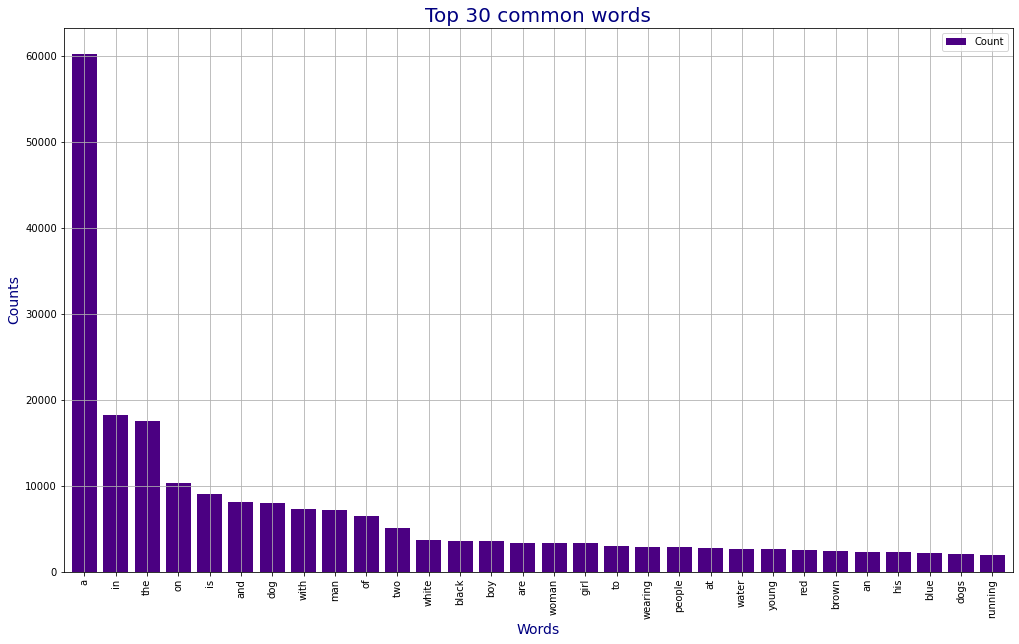

In [24]:
for word, count in tokenizer_top_words_count.most_common(30) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(30)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=0.8, color = 'indigo', figsize = (17, 10))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')
plt.grid(b=None)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_9276\2334716237.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = None)


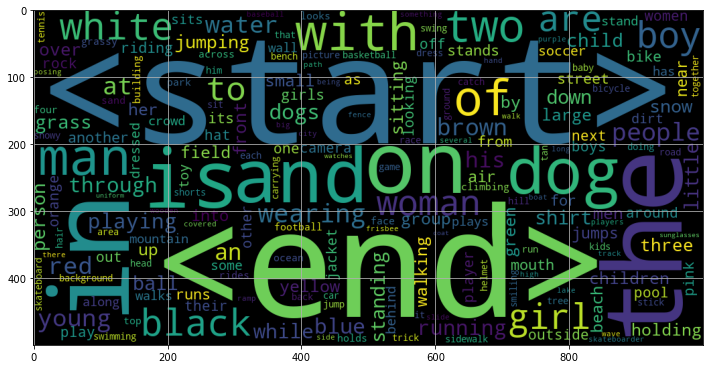

In [25]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)
plt.grid(b = None)

In [29]:
file = open('tokenizer.pkl', 'wb')
pickle.dump(tokenizer, file)


In [26]:
# Pad each vector to the max_length of the captions  store it to a vairable

train_seqs_len = [len(seq) for seq in train_seqs]

longest_word_length = max(train_seqs_len)

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


In [27]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [39]:
#checking image format 

tf.keras.backend.image_data_format()


'channels_last'

In [40]:
for img in all_imgs[0:5] :
    img = tf.io.read_file(img, name=None)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    preprocessed_image.append(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


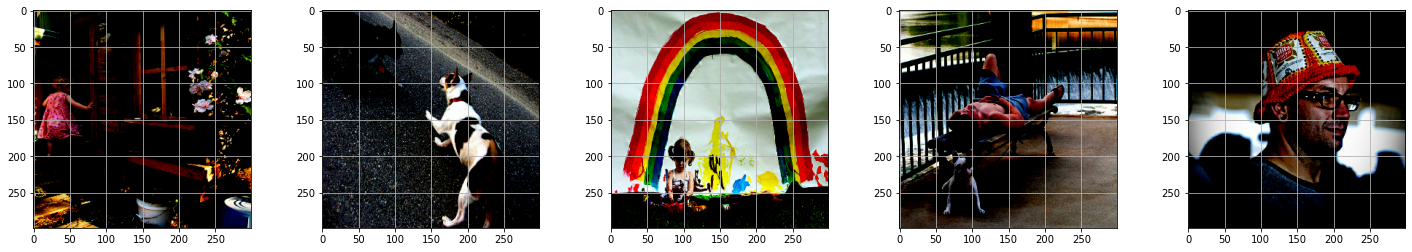

In [41]:
# checking first five images post preprocessing
Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)
for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')


 <h2>  Dataset creation
</h2><ul>
  <li><p>Create a function which maps the image path to their feature</p>
        </li>
  <li><p>Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset</p></li>
  <li>Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42
</li>
    <li>Make sure you have done Shuffle and batch while building the dataset</li>
<li>
The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)
</li>

</ul>






In [42]:
def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [45]:
len(all_img_vector)

40455

In [46]:
# Map each image full path to the function, in order to preprocess the image
training_list = sorted(set(all_img_vector))
New_Img = tf.data.Dataset.from_tensor_slices(training_list)
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
New_Img = New_Img.batch(64, drop_remainder=False)


In [47]:
#Ratio = 80:20 and we will set random state = 42
path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [48]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


 <h2> Load the pretrained Imagenet weights of Inception net V3
</h2><ul>
  <li><p>To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.</p>
        </li>
  <li><p>The shape of the output of this layer is 8x8x2048.</p></li>
  <li>Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)
</li>
   

    

In [36]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input 
hidden_layer = image_model.layers[-1].output  
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

In [37]:
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [156]:
image_features_extract_model.save('feature_extractor.h5')

In [38]:
# extract features from each image in the dataset
img_features = {}
for image, image_path in tqdm(New_Img) :
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 127/127 [03:42<00:00,  1.75s/it]


In [40]:
batch_features_flattened

<tf.Tensor: shape=(27, 64, 2048), dtype=float32, numpy=
array([[[0.0000000e+00, 7.7387460e-02, 0.0000000e+00, ...,
         2.3173788e-01, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.0771771e-01, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.9400232e-01, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 1.8594813e-01],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 1.6566762e+00, 0.0000000e+00],
        [0.0000000e+00, 4.0256831e-01, 0.0000000e+00, ...,
         0.0000000e+00, 3.1778339e-01, 0.0000000e+00],
        [0.0000000e+00, 2.5346794e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.2506071e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 7.8487746e-02, ...,
         1.2064043e+00, 0.0000000e+00, 0.0000000e+00],
        [0.000000

In [41]:
batch_feat.shape

TensorShape([64, 2048])

In [42]:
#view top five items of img_features dict
import more_itertools
top_5 = more_itertools.take(5, img_features.items())
top_5

[('Flickr8k_Dataset/Images/1000268201_693b08cb0e.jpg',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.16980712],
         [0.        , 0.        , 1.0106233 , ..., 0.        , 0.        ,
          0.06108405],
         ...,
         [0.        , 0.        , 2.0376902 , ..., 1.2029176 , 0.        ,
          1.9924543 ],
         [0.        , 0.        , 0.9044041 , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.2525775 , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32)),
 ('Flickr8k_Dataset/Images/1001773457_577c3a7d70.jpg',
  array([[0.        , 0.6637061 , 0.4626027 , ..., 0.        , 0.        ,
          3.3320928 ],
         [0.        , 1.2270792 , 0.        , ..., 0.        , 0.25356138,
          3.329323  ],
         [1.2882354 , 1.5197701 , 0.        , ..., 0.46773374, 0.36446494,

In [43]:
#to provide, both images along with the captions as input
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [44]:
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier
BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):
        
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    return data

In [45]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [46]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 31)


<h2> Model Building</h2>
<ul>
 <li><p>Set the parameters</p></li>
<li><p>Build the Encoder</p></li>
<li><p>Visualise the top 30 occuring words in the captions<p></li>
    <li><p>Visualise the top 30 occuring words in the captions</p></li>
    <li><p>Create a list which contains all the captions & path</p></li>
</ul>

In [59]:
# Setting  parameters

embedding_dim = 256 
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE 
test_num_steps = len(path_test) // BATCH_SIZE  

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

 <h2>  Encoder (CNN)
</h2><ul>
  <li><p>The encoder parts involve the convolution of the input image with the help of various convolution, max pooling, and fully connected layers. </p>
        </li>
  <li><p>Since we are not dealing with the classification of the image, we have removed them from the end. 
</p></li>
    <li><p>The final output of the encoder part will be the generation of the feature vector.</p>
</li>
    
</ul>


In [48]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [7]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [50]:
encoder=Encoder(embedding_dim)

In [51]:
from keras.utils.vis_utils import plot_model



 <h2> Important aspects of Encoder
</h2><ul>
  <li><p>The CNN-based encoder produces the feature vector which is the encoded representation of the input image.</p>
        </li>
  <li><p>The resulting **feature vector is static** and does not change at each timestamp.
    </p></li>
    <li><p>Therefore we need to pass this vector to the **attention model along with the hidden state of the decoder to create the context vector**. </p>
</li>
   
</ul>


 <h2> Attention model
</h2><ul>
  <li><p>Attention is an interface connecting the encoder and decoder that provides the decoder with information from every encoder hidden state.</p>
        </li>
  <li><p>With this framework, the model is able to  selectively focus on valuable parts of the input sequence and hence, learn the association between them.</p></li>
    <li><p>The attention model produces an output(context vector) that is fed to the decoder for predicting the word at that timestamp</p>
</li>
    <li><p>This output, i.e context vector is adaptive in nature and change for each timestamp</p>
</li>
    <li><p>It aims to overcome the limitation of traditional CNN-RNN based models. Using this, **instead of passing the complete input image to the RNN at every timestamp, we can pass different relevant parts of the image to it</p></li>
</ul>


 

In [56]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) 
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1) 
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis = hidden[:, tf.newaxis]
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        return context_vector, attention_weights

 <h2> Decoder </h2><ul>
  <li><p>Input to GRU : Context vector (from attention model) concatenated with  embedded vector (embedding layer). Output of this concatenation layer is fed to GRU as input</p>
        </li>
  <li><p>Embedding layer present inside the decoder takes the input sequence preprocessed and transformed such that all samples have equal sequence length - through padding followed by masking). Embedding layer transforms this into an embedded vector.</p></li>
  <li><p>Concatenation layer contains : Embedded vector (output of embedding layer) along with the Context vector (output of attention model)</p>
</li>
    
</ul>




In [6]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [57]:

decoder=Decoder(embedding_dim, units, vocab_size)

In [55]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


 <h2> Model training & optimization
</h2><ul>
  <li><p>Set the optimizer & loss object</p></li>
  <li><p>Visualise both the images & text present in the dataset</p></li>
    <li><p>Create your checkpoint path</p></li>
    <li><p>Create your training & testing step functions</p></li>
    <li><p>Create your loss function for the test dataset</p></li>
</ul>




In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [57]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape
    
    return tf.reduce_mean(loss_)

 <h2> Why Masking ?</h2>
 <ul>
  <li><p>Padding can result in a risk of adding penalty to the model.</p>
        </li>
  <li><p>Once the padding is done, we need to apply 'masking'</p></li>
    <li><p>Without masking, the model will **consider the padded input at that timestep, which will contribute to an increased loss</p>
</li>
    <li><p>Through masking we need to inform the model to **ignore whenever a padded input is passed at a timestep**, hinting that this part of the input is padded.</p>
</li>
<li>Create a list which contains all the captions & path</li>
</ul>

  
 




In [58]:
checkpoint_path = "Flickr8K/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [59]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

 <h2> While creating the training step for your model, we will apply Teacher forcing mechanism.
</h2><ul>
  <li><p>Why Teacher Forcing ?</p></li>
  <li><p>There are multiple issues with with training recurrent neural networks that use output from prior time steps as input :</p></li>
 <li><p>Slow convergence</p></li>
    
 <li><p>Model instability</p></li>
    
 <li><p>Poor skill</p></li>
 <li><p>If the previous output is incorrect (by any chance), it will result in inaccurate input for the next time stamp which will further result in a different output than expected and the process will continue.</p>
</li>
<li>As a result, the model will get off track and will get punished for every subsequent word it generates. This makes learning slower and the model unstable.</li>
<li><p>To address this we Teacher Forcing</p></li>
</ul>



 <P>Teacher forcing is a fast and effective way to train a recurrent neural network, where the **target/real word (i.e ground truth) is passed as the next input to the decoder instead of previous prediciton or output.**
 
 
 Training with Teacher Forcing **converges faster.** At the early stages of training, the predictions of the model are very bad.
 
 If we do not use Teacher Forcing, the hidden states of the model will be updated by a sequence of wrong predictions, errors will accumulate, and it is difficult for the model to learn from that.</P>

In [60]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [61]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)
      for r in range(1, target.shape[1]) :
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)
        dec_input = tf.expand_dims(target[: , r], 1)
    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss

In [62]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [63]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/30 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.437, & test loss is 1.200
Time taken for 1 epoch 373.7268087863922 sec

Test loss has been reduced from 100.000 to 1.200


  3%|▎         | 1/30 [06:17<3:02:18, 377.19s/it]

For epoch: 2, the train loss is 1.109, & test loss is 1.057
Time taken for 1 epoch 213.60602927207947 sec

Test loss has been reduced from 1.200 to 1.057


  7%|▋         | 2/30 [09:53<2:11:57, 282.77s/it]

For epoch: 3, the train loss is 1.003, & test loss is 0.970
Time taken for 1 epoch 221.23551082611084 sec

Test loss has been reduced from 1.057 to 0.970


 10%|█         | 3/30 [13:37<1:55:11, 255.99s/it]

For epoch: 4, the train loss is 0.930, & test loss is 0.903
Time taken for 1 epoch 209.07410502433777 sec

Test loss has been reduced from 0.970 to 0.903


 13%|█▎        | 4/30 [17:09<1:43:22, 238.57s/it]

For epoch: 5, the train loss is 0.870, & test loss is 0.848
Time taken for 1 epoch 216.34799528121948 sec

Test loss has been reduced from 0.903 to 0.848


 17%|█▋        | 5/30 [20:49<1:36:31, 231.64s/it]

For epoch: 6, the train loss is 0.817, & test loss is 0.798
Time taken for 1 epoch 213.55355858802795 sec

Test loss has been reduced from 0.848 to 0.798


 20%|██        | 6/30 [24:25<1:30:35, 226.49s/it]

For epoch: 7, the train loss is 0.770, & test loss is 0.751
Time taken for 1 epoch 215.75901985168457 sec

Test loss has been reduced from 0.798 to 0.751


 23%|██▎       | 7/30 [28:04<1:25:48, 223.86s/it]

For epoch: 8, the train loss is 0.725, & test loss is 0.708
Time taken for 1 epoch 223.48081135749817 sec

Test loss has been reduced from 0.751 to 0.708


 27%|██▋       | 8/30 [31:50<1:22:20, 224.58s/it]

For epoch: 9, the train loss is 0.684, & test loss is 0.668
Time taken for 1 epoch 209.8628134727478 sec

Test loss has been reduced from 0.708 to 0.668


 30%|███       | 9/30 [35:22<1:17:18, 220.86s/it]

For epoch: 10, the train loss is 0.646, & test loss is 0.633
Time taken for 1 epoch 223.64866971969604 sec

Test loss has been reduced from 0.668 to 0.633


 33%|███▎      | 10/30 [39:09<1:14:12, 222.61s/it]

For epoch: 11, the train loss is 0.610, & test loss is 0.598
Time taken for 1 epoch 222.70389771461487 sec

Test loss has been reduced from 0.633 to 0.598


 37%|███▋      | 11/30 [42:55<1:10:46, 223.51s/it]

For epoch: 12, the train loss is 0.578, & test loss is 0.568
Time taken for 1 epoch 215.31573867797852 sec

Test loss has been reduced from 0.598 to 0.568


 40%|████      | 12/30 [46:32<1:06:32, 221.81s/it]

For epoch: 13, the train loss is 0.548, & test loss is 0.538
Time taken for 1 epoch 221.65494751930237 sec

Test loss has been reduced from 0.568 to 0.538


 43%|████▎     | 13/30 [50:17<1:03:03, 222.57s/it]

For epoch: 14, the train loss is 0.522, & test loss is 0.513
Time taken for 1 epoch 222.822833776474 sec

Test loss has been reduced from 0.538 to 0.513


 47%|████▋     | 14/30 [54:02<59:35, 223.45s/it]  

For epoch: 15, the train loss is 0.495, & test loss is 0.487
Time taken for 1 epoch 220.67836332321167 sec

Test loss has been reduced from 0.513 to 0.487


 50%|█████     | 15/30 [57:46<55:52, 223.50s/it]

For epoch: 16, the train loss is 0.471, & test loss is 0.462
Time taken for 1 epoch 218.50644779205322 sec

Test loss has been reduced from 0.487 to 0.462


 53%|█████▎    | 16/30 [1:01:28<52:01, 222.95s/it]

For epoch: 17, the train loss is 0.450, & test loss is 0.443
Time taken for 1 epoch 221.97896122932434 sec

Test loss has been reduced from 0.462 to 0.443


 57%|█████▋    | 17/30 [1:05:12<48:25, 223.49s/it]

For epoch: 18, the train loss is 0.432, & test loss is 0.422
Time taken for 1 epoch 212.7932653427124 sec

Test loss has been reduced from 0.443 to 0.422


 60%|██████    | 18/30 [1:08:48<44:13, 221.15s/it]

For epoch: 19, the train loss is 0.414, & test loss is 0.407
Time taken for 1 epoch 210.7213191986084 sec

Test loss has been reduced from 0.422 to 0.407


 63%|██████▎   | 19/30 [1:12:21<40:07, 218.82s/it]

For epoch: 20, the train loss is 0.398, & test loss is 0.389
Time taken for 1 epoch 221.76796436309814 sec

Test loss has been reduced from 0.407 to 0.389


 67%|██████▋   | 20/30 [1:16:06<36:45, 220.52s/it]

For epoch: 21, the train loss is 0.383, & test loss is 0.377
Time taken for 1 epoch 224.62027716636658 sec

Test loss has been reduced from 0.389 to 0.377


 70%|███████   | 21/30 [1:19:53<33:23, 222.61s/it]

For epoch: 22, the train loss is 0.369, & test loss is 0.360
Time taken for 1 epoch 223.07489657402039 sec

Test loss has been reduced from 0.377 to 0.360


 73%|███████▎  | 22/30 [1:23:40<29:49, 223.68s/it]

For epoch: 23, the train loss is 0.354, & test loss is 0.346
Time taken for 1 epoch 208.87220072746277 sec

Test loss has been reduced from 0.360 to 0.346


 77%|███████▋  | 23/30 [1:27:11<25:40, 220.09s/it]

For epoch: 24, the train loss is 0.340, & test loss is 0.332
Time taken for 1 epoch 213.9255051612854 sec

Test loss has been reduced from 0.346 to 0.332


 80%|████████  | 24/30 [1:30:48<21:54, 219.05s/it]

For epoch: 25, the train loss is 0.331, & test loss is 0.328
Time taken for 1 epoch 218.0413179397583 sec

Test loss has been reduced from 0.332 to 0.328


 87%|████████▋ | 26/30 [1:37:56<14:24, 216.01s/it]

For epoch: 26, the train loss is 0.320, & test loss is 0.339
Time taken for 1 epoch 207.75998401641846 sec

For epoch: 27, the train loss is 0.328, & test loss is 0.309
Time taken for 1 epoch 215.78698253631592 sec

Test loss has been reduced from 0.328 to 0.309


 90%|█████████ | 27/30 [1:41:35<10:50, 216.75s/it]

For epoch: 28, the train loss is 0.301, & test loss is 0.291
Time taken for 1 epoch 216.63334727287292 sec

Test loss has been reduced from 0.309 to 0.291


 93%|█████████▎| 28/30 [1:45:14<07:15, 217.60s/it]

For epoch: 29, the train loss is 0.289, & test loss is 0.286
Time taken for 1 epoch 215.85421633720398 sec

Test loss has been reduced from 0.291 to 0.286


 97%|█████████▋| 29/30 [1:48:53<03:37, 217.93s/it]

For epoch: 30, the train loss is 0.285, & test loss is 0.279
Time taken for 1 epoch 221.22551894187927 sec

Test loss has been reduced from 0.286 to 0.279


100%|██████████| 30/30 [1:52:37<00:00, 225.26s/it]


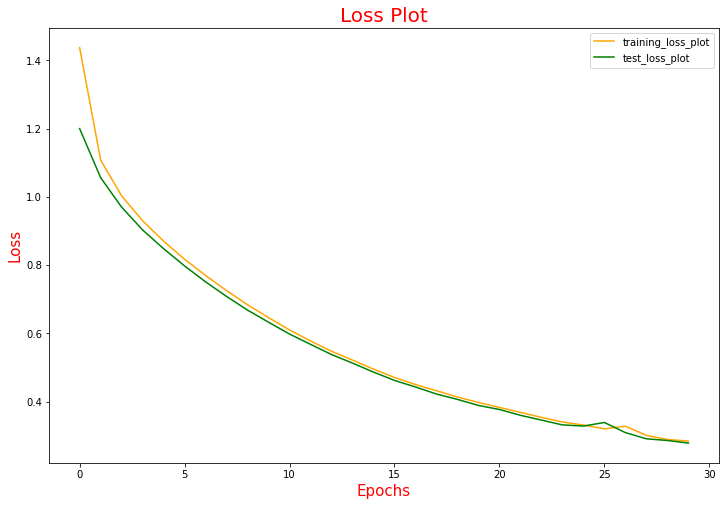

In [64]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()


In [97]:
decoder.save('decoder',save_format='tf')


INFO:tensorflow:Assets written to: decoder\assets


INFO:tensorflow:Assets written to: decoder\assets


In [98]:
encoder.save('encoder',save_format='tf')

INFO:tensorflow:Assets written to: encoder\assets


INFO:tensorflow:Assets written to: encoder\assets


In [9]:
saved_decoder_model=keras.models.load_model(
    "decoder", custom_objects={"CustomModel": Decoder}
)

In [112]:
saved_decoder_model.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  524544    
                                                                 
Total params: 524,544
Trainable params: 524,544
Non-trainable params: 0
_________________________________________________________________


In [8]:
saved_encoder_model=keras.models.load_model(
    "encoder", custom_objects={"CustomModel": Encoder}
)

In [10]:
extract_features=load_model('feature_extractor.h5')

<h2>Model Evaluation</h2> 
<ul>
<li><p>Define your evaluation function using greedy search</p></li>
<li><p>Define your evaluation function using beam search ( optional)</p></li>
<li><p>Test it on a sample data using BLEU score</p></li>
</ul>

<h2>Greedy Search</h2>
<ul>
 <li>This method is a simple approximation technique which calculates the probability of the words according to their occurrence in the English vocabulary.</li>
 
 <li>It takes the sample of the words, finds the probability of each of the words, and then outputs the word with the highest probability.</li>
 
 <li>Greedy Search will always consider only one best alternative and this makes the computational speed of the model fast, but the accuracy might not be up to the mark.</li>
    </ul>

In [115]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_input) 
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) 

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) 
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() 
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [116]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (20, 20))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [117]:
from nltk.translate.bleu_score import sentence_bleu

In [118]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [119]:
image_test = path_test.copy()

In [120]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_image = image_test[rid]
    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)
    real_caption=filt_text(real_caption)      
    pred_caption=' '.join(result).rsplit(' ', 1)[0]
    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()
    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"BLEU score: {score*100}")
    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attention_map(result, attention_plot, test_image)
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_image
    


 <h2> Test Images
</h2><ul>
  <li><p>BLEU is a well-acknowledged metric to measure similarity of one hypothesis sentence to multiple reference sentences. Given a single hypothesis sentence and multiple reference sentences, it returns a value between 0 and 1</p>
        </li>
  <li><p>The metric close to 1 means that the two are very similar.</p></li>
  <li>We use the BLEU measure to evaluate the result of the test set generated captions. The BLEU is simply taking the fraction of n-grams in the predicted sentence that appears in the ground-truth
</li>   
</ul>

BLEU score: 100.0
Real Caption: girl laughing on water slide
Prediction Caption: girl laughing on water slide


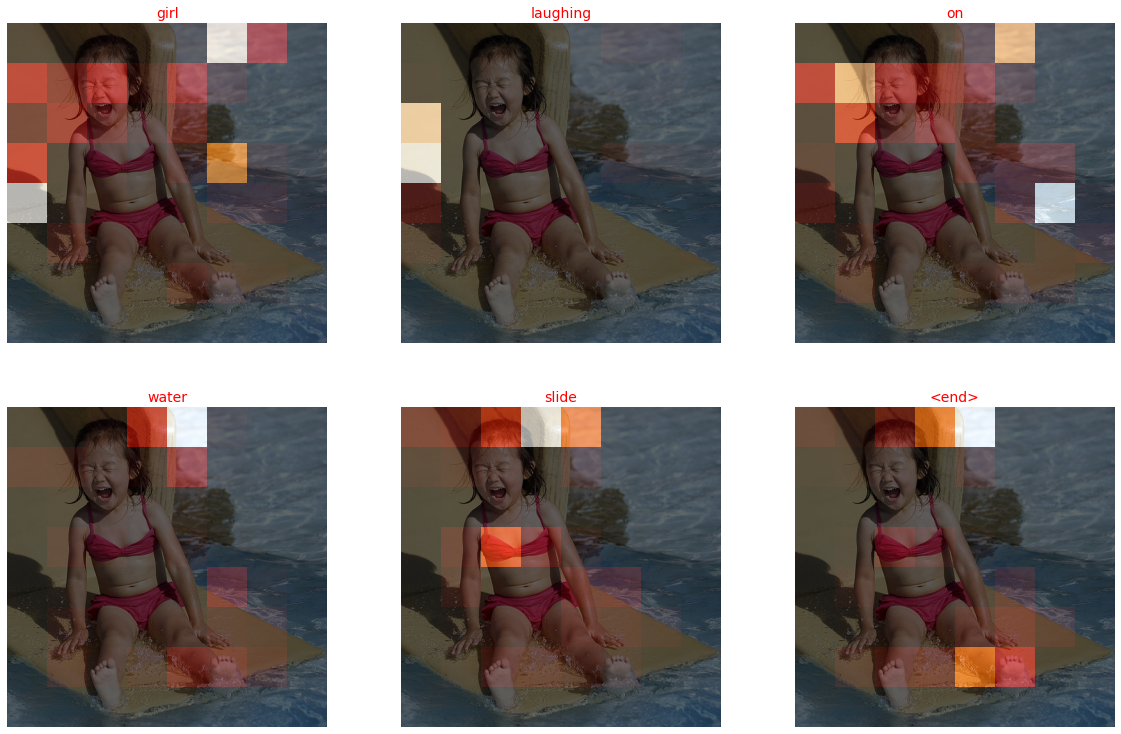

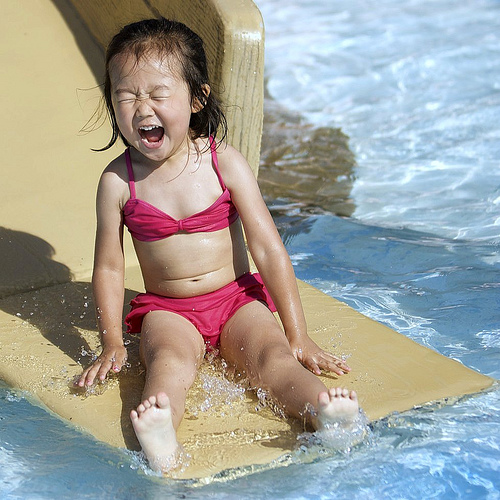

In [121]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

c:\Users\bhatt\anaconda3\envs\dLenv\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\bhatt\anaconda3\envs\dLenv\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\bhatt\anaconda3\envs\dLenv\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or

BLEU score: 6.10669334877734e-76
Real Caption: baby in UNK crawls on clean hardwood floor
Prediction Caption: little boy wearing pajamas crawls across the floor


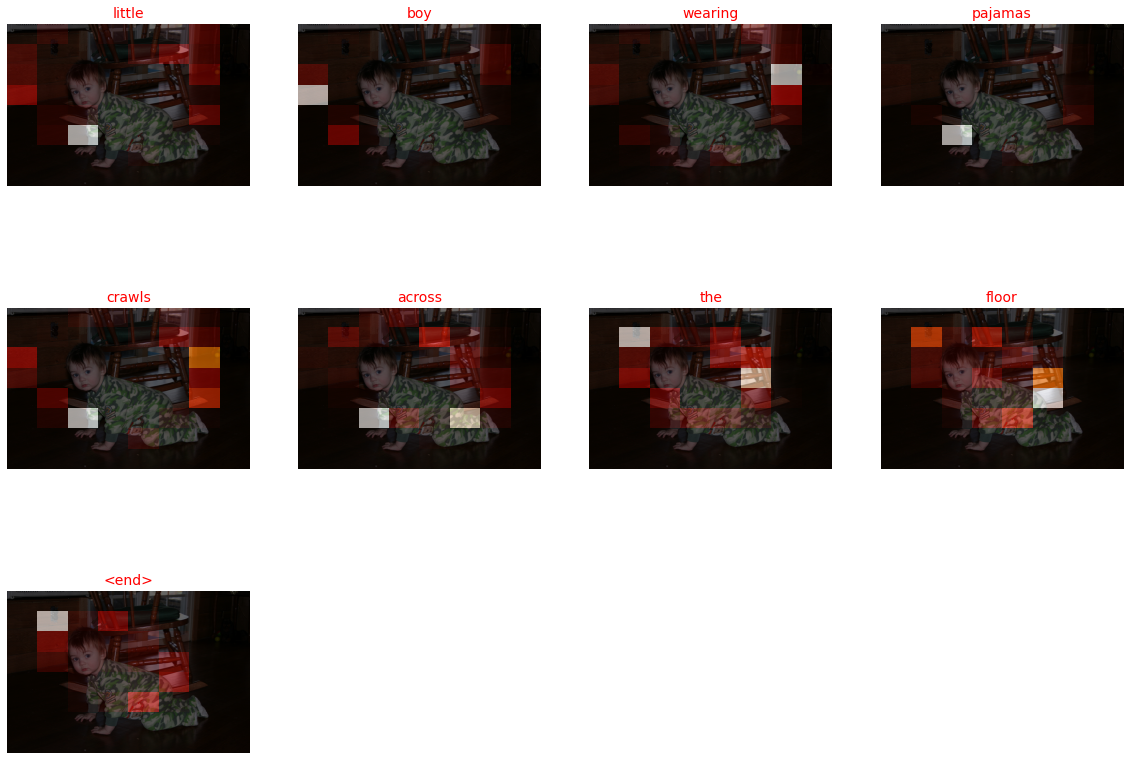

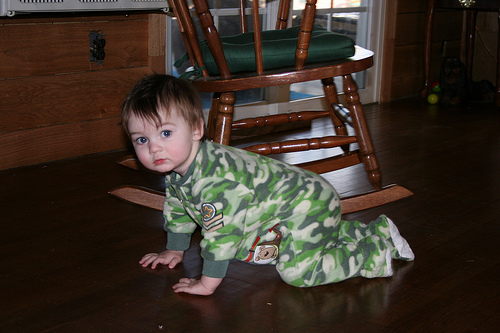

In [82]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 100.0
Real Caption: buy in orange shorts and flip flops plays with soccer ball
Prediction Caption: buy in orange shorts and flip flops plays with soccer ball


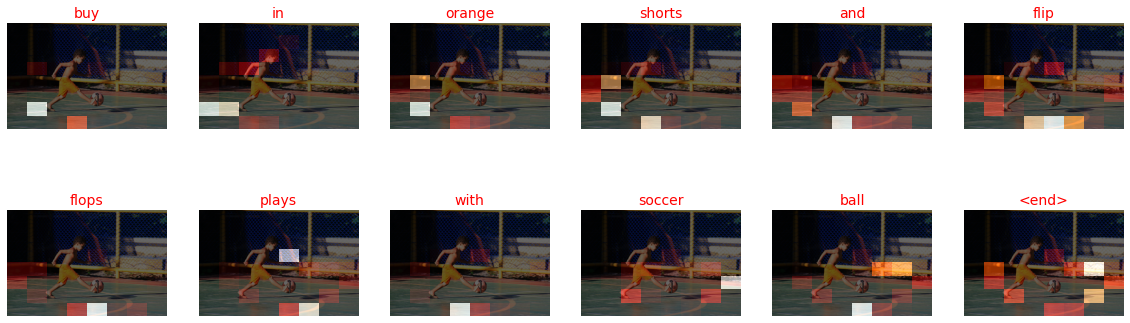

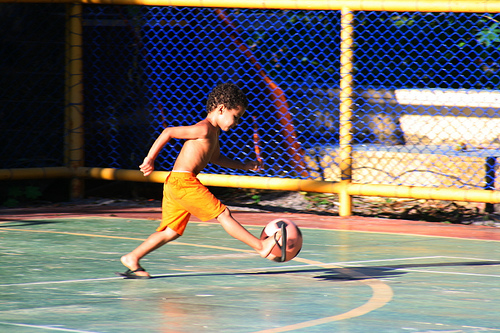

In [125]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 100.0
Real Caption: man wearing glasses is drawing
Prediction Caption: man wearing glasses is drawing


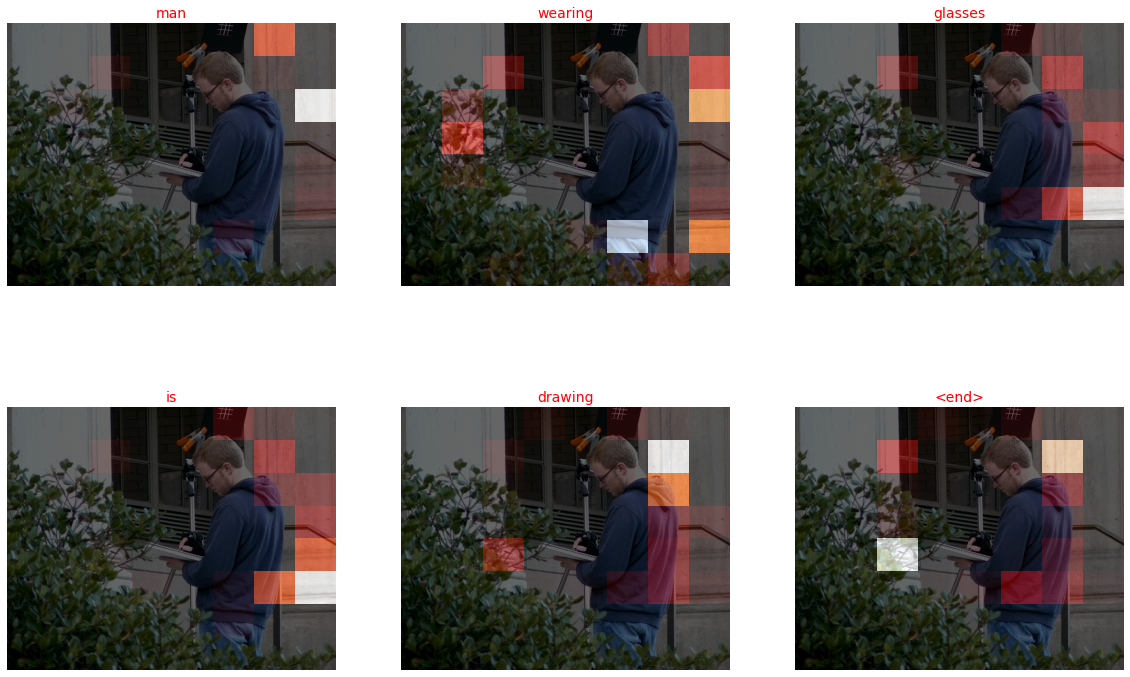

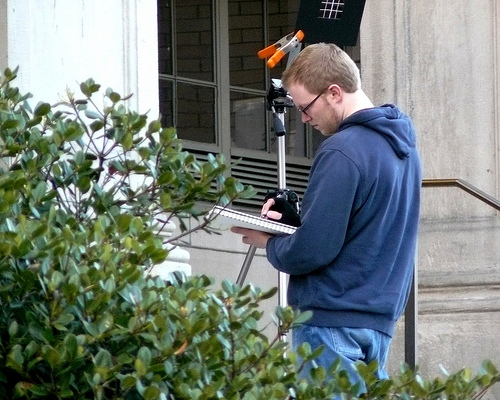

In [124]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.5, 0, 0))
Image.open(test_image)

BLEU score: 100.0
Real Caption: tennis player about to hit the ball
Prediction Caption: tennis player about to hit the ball


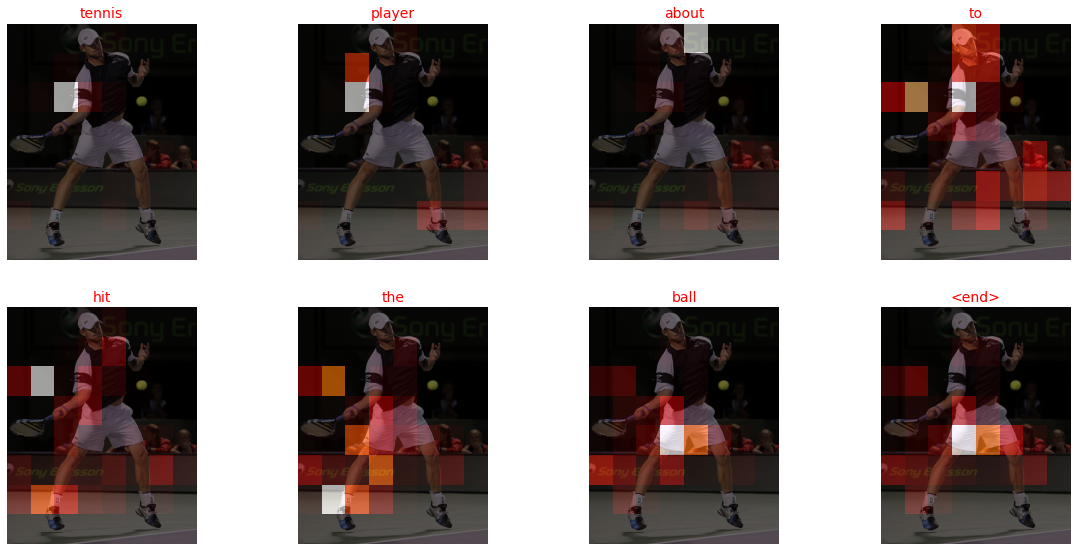

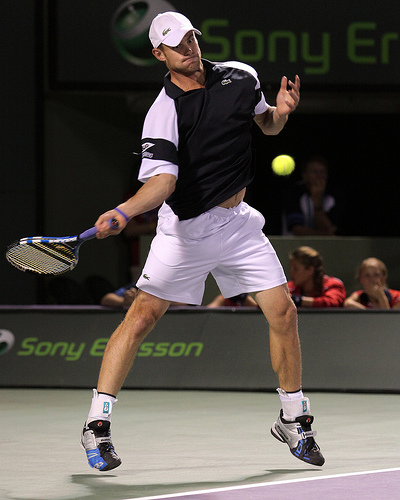

In [85]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.5, 0, 0))
Image.open(test_image)

BLEU score: 100.0
Real Caption: person taking pictures outside in the snow
Prediction Caption: person taking pictures outside in the snow


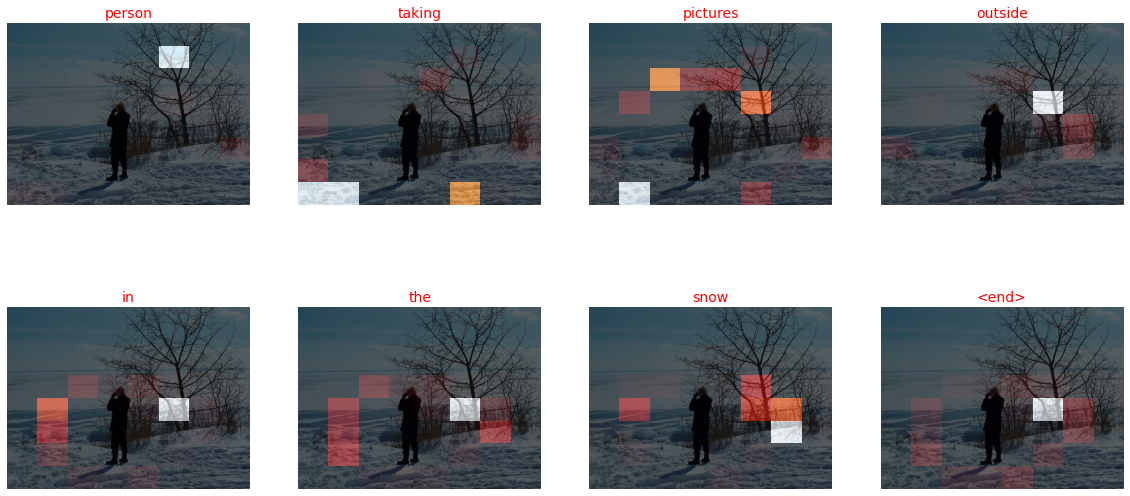

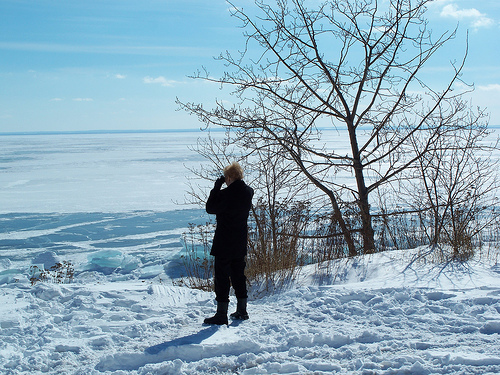

In [123]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.25, 0.25, 0, 0))
Image.open(test_image)


In [87]:
encoder.save_weights('./outputs_encoder')
decoder.save_weights('./outputs_decoder')